<a href="https://colab.research.google.com/github/harodjoseph/TUGASPYTHON/blob/main/HarodJoseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
cd /content/drive/MyDrive/CNNDUA

/content/drive/MyDrive/CNNDUA


In [18]:
ls

dataset/  gambardaun.jpg  nnmodel_daun/


In [19]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [20]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [21]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [22]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [23]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [24]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [25]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 64, 64, 3)
(148, 64, 64, 3)


In [26]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(21, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(21, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 21)        588       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 21)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 21)        3990      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 21)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4116)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               411700    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [27]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(240*240*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 172800)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               17280100  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 17,282,039
Trainable params: 17,282,039
Non-trainable params: 0
_________________________________________________________________


In [31]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [32]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=30)

Epoch 1/25
15/15 [==============================] - 2s 110ms/step - loss: 1.6480 - accuracy: 0.1667 - val_loss: 1.5910 - val_accuracy: 0.3041
Epoch 2/25
15/15 [==============================] - 2s 101ms/step - loss: 1.5774 - accuracy: 0.2973 - val_loss: 1.5822 - val_accuracy: 0.2027
Epoch 3/25
15/15 [==============================] - 2s 102ms/step - loss: 1.5143 - accuracy: 0.3378 - val_loss: 1.4499 - val_accuracy: 0.4122
Epoch 4/25
15/15 [==============================] - 2s 102ms/step - loss: 1.3602 - accuracy: 0.4617 - val_loss: 1.3298 - val_accuracy: 0.4324
Epoch 5/25
15/15 [==============================] - 2s 103ms/step - loss: 1.1887 - accuracy: 0.5383 - val_loss: 1.2382 - val_accuracy: 0.4932
Epoch 6/25
15/15 [==============================] - 2s 104ms/step - loss: 1.0636 - accuracy: 0.5833 - val_loss: 1.0997 - val_accuracy: 0.5743
Epoch 7/25
15/15 [==============================] - 2s 102ms/step - loss: 0.9244 - accuracy: 0.6622 - val_loss: 0.9917 - val_accuracy: 0.6216
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


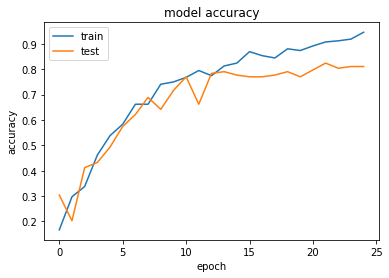

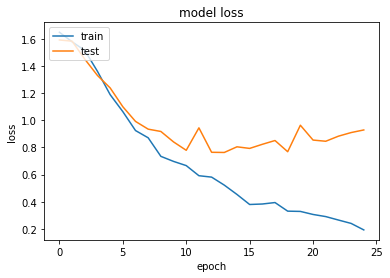

In [33]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.74      0.89      0.81        28
      GMB_03       0.92      0.76      0.83        29
      GMB_04       0.78      0.89      0.83        28
      GMB_05       0.93      0.76      0.83        33
      GMB_06       0.74      0.77      0.75        30

    accuracy                           0.81       148
   macro avg       0.82      0.81      0.81       148
weighted avg       0.82      0.81      0.81       148



In [35]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets


In [36]:
import cv2
import matplotlib.pyplot as plt
image1='gambardaun.jpg'

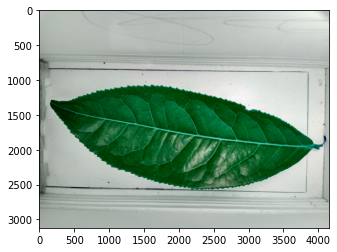

In [37]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [38]:
image_testing = Image.open('gambardaun.jpg')
image_testing = np.array(image_testing.resize((240, 240))) / 255.0
image_testing.shape

(240, 240, 3)

In [39]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 240, 240, 3)
